Number of common genes: 970
Sampled 100 genes: ['Ttr' 'Exoc7' 'Acadm' 'Plut' 'Kcnh8' 'Rtn1' 'Poc1a' 'Smc2' 'Gpd2'
 'Mthfd2'] ...


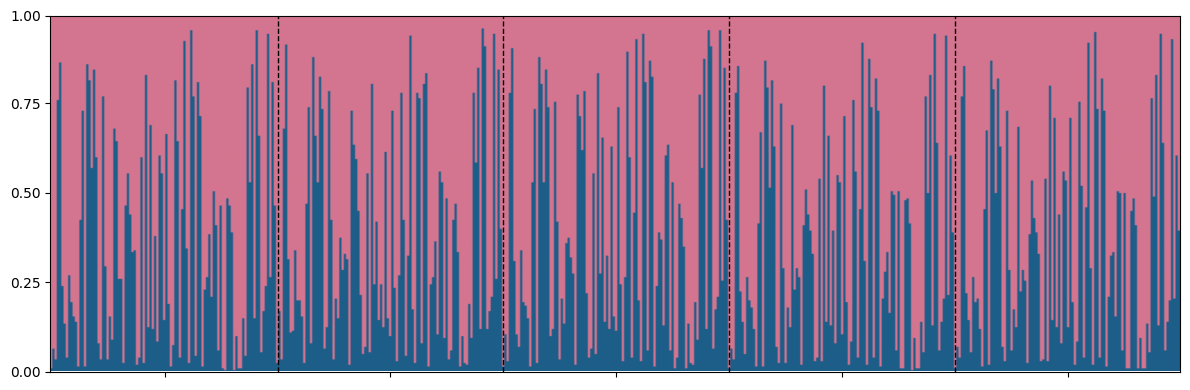

In [1]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

dataset = 'data04'
# ====== Configuration ======
vertical_res = 200  # y-axis discrete points, controls smoothness

# ====== Load five adata objects ======
# Note: Ensure 'data_dir' and 'dataset' are defined before this loop
adatas = []
for idx in range(5):
    ad = sc.read_h5ad(
        Path(dataset) / f"adata_preprocessed_{idx}.h5ad"
    )
    adatas.append(ad)

# ====== Identify common genes across five adatas ======
var_sets = [set(ad.var_names) for ad in adatas]
common_genes = set.intersection(*var_sets)

print("Number of common genes:", len(common_genes))

# Randomly sample 100 common genes
np.random.seed(0)
genes_100 = np.random.choice(sorted(list(common_genes)), size=100, replace=False)
print("Sampled 100 genes:", genes_100[:10], "...")

# ====== Calculate unspliced/spliced ratio for each gene ======
all_un_props = []  # Total 500 columns: 100 genes per adata

for ad in adatas:
    idx = ad.var_names.get_indexer(genes_100)

    U = ad.layers["unspliced"][:, idx].sum(axis=0)
    S = ad.layers["spliced"][:, idx].sum(axis=0)

    U = np.asarray(U).ravel()
    S = np.asarray(S).ravel()
    T = U + S
    T[T == 0] = 1

    un_prop = U / T
    all_un_props.append(un_prop)

# Concatenate into 500 columns
un_props_concat = np.concatenate(all_un_props)

# ====== Construct image matrix ======
H = vertical_res
W = un_props_concat.size

img = np.zeros((H, W), dtype=np.uint8)
blue_heights = np.round(un_props_concat * (H - 1)).astype(int)

for j, h in enumerate(blue_heights):
    img[:h+1, j] = 1

# ====== Plotting ======
cmap = plt.matplotlib.colors.ListedColormap(["#d47590", "#1D5E89"])

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(111)

ax.imshow(img, aspect="auto", cmap=cmap, origin="lower")

# ====== y-axis settings ======
ax.set_ylim(0, H-1)  # Ensure full display
ax.set_yticks([0, H*0.25, H*0.5, H*0.75, H-1])
ax.set_yticklabels(["0.00", "0.25", "0.50", "0.75", "1.00"], fontsize=10)

# Hide y-axis label
ax.set_ylabel("")

# ====== x-axis settings ======
ax.set_xticks([50, 150, 250, 350, 450])
ax.set_xticklabels([])

# Vertical divider every 100 columns
for x in [100, 200, 300, 400]:
    ax.axvline(x, linestyle='--', linewidth=1, color='black')

# Hide title
ax.set_title("")

plt.tight_layout()
plt.savefig(f"usratio.png", bbox_inches="tight", dpi=300)
plt.show()

In [2]:
umap_colors = [
    "#d0af4c",
    "#d8a373",
    "#fddea5",
    "#7a4171",
    "#897858",
    "#2a83a2",
    "#6c848d",
    "#84b9cb",
]

In [3]:
from pathlib import Path
import os
import scvelo as scv
from scipy.sparse import issparse
dataset = "data04"
methods_for_pan = ["velovi","cell2fate","celldancer"]
methods_for_qn = ["alevin","kallisto_bustools","dropest","starsolo","velocyto"]

computing velocity graph (using 20/24 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:03) --> added 
    'velovi_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velovi_velocity_umap', embedded velocity vectors (adata.obsm)


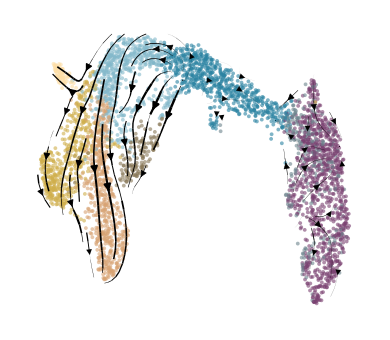

computing velocity graph (using 20/24 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velovi_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velovi_velocity_umap', embedded velocity vectors (adata.obsm)


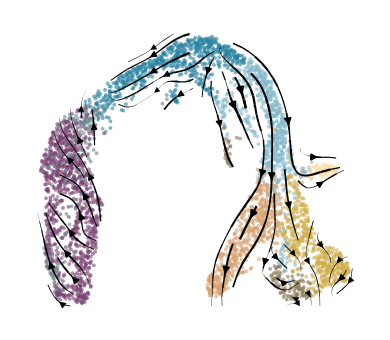

computing velocity graph (using 20/24 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velovi_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velovi_velocity_umap', embedded velocity vectors (adata.obsm)


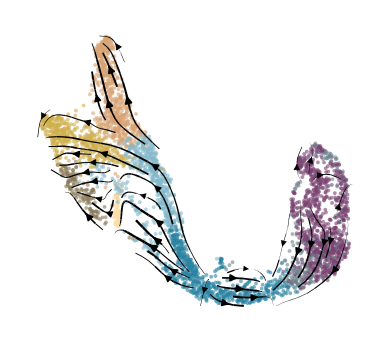

computing velocity graph (using 20/24 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velovi_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velovi_velocity_umap', embedded velocity vectors (adata.obsm)


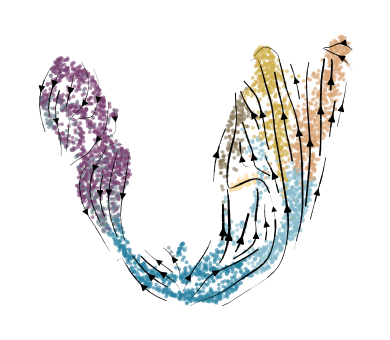

computing velocity graph (using 20/24 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:03) --> added 
    'velovi_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velovi_velocity_umap', embedded velocity vectors (adata.obsm)


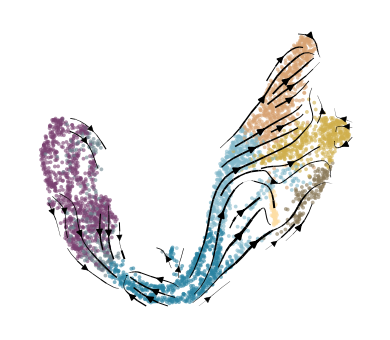

computing velocity graph (using 20/24 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:13) --> added 
    'cell2fate_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'cell2fate_velocity_umap', embedded velocity vectors (adata.obsm)


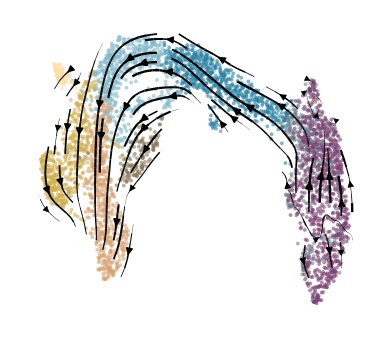

computing velocity graph (using 20/24 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:10) --> added 
    'cell2fate_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'cell2fate_velocity_umap', embedded velocity vectors (adata.obsm)


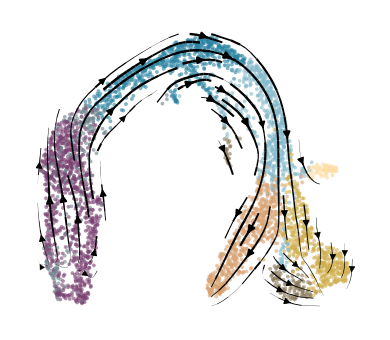

computing velocity graph (using 20/24 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:12) --> added 
    'cell2fate_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'cell2fate_velocity_umap', embedded velocity vectors (adata.obsm)


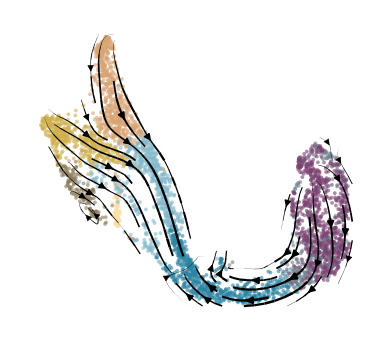

computing velocity graph (using 20/24 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:11) --> added 
    'cell2fate_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'cell2fate_velocity_umap', embedded velocity vectors (adata.obsm)


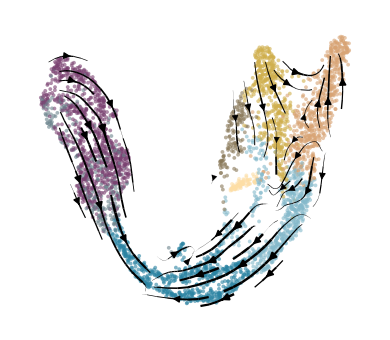

computing velocity graph (using 20/24 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:11) --> added 
    'cell2fate_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'cell2fate_velocity_umap', embedded velocity vectors (adata.obsm)


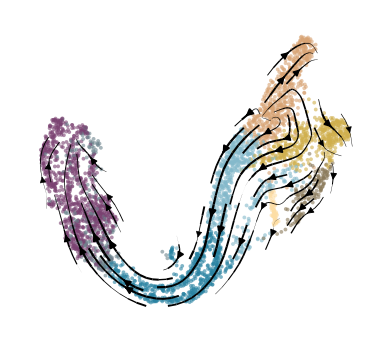

computing velocity graph (using 20/24 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:03) --> added 
    'celldancer_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'celldancer_velocity_umap', embedded velocity vectors (adata.obsm)


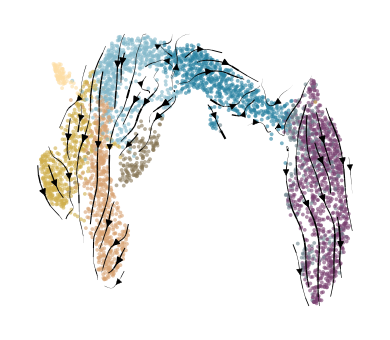

computing velocity graph (using 20/24 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:03) --> added 
    'celldancer_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'celldancer_velocity_umap', embedded velocity vectors (adata.obsm)


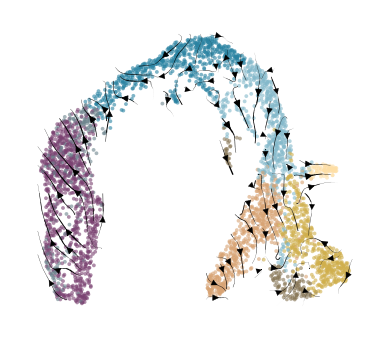

computing velocity graph (using 20/24 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:03) --> added 
    'celldancer_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'celldancer_velocity_umap', embedded velocity vectors (adata.obsm)


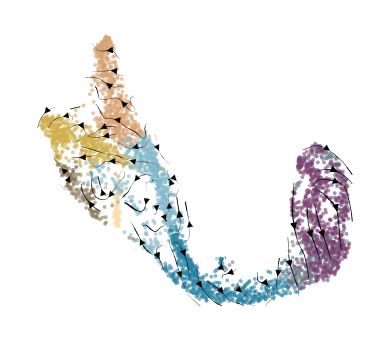

computing velocity graph (using 20/24 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:03) --> added 
    'celldancer_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'celldancer_velocity_umap', embedded velocity vectors (adata.obsm)


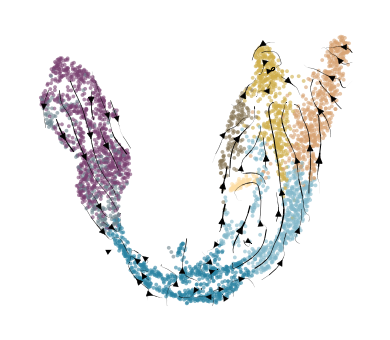

computing velocity graph (using 20/24 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:03) --> added 
    'celldancer_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'celldancer_velocity_umap', embedded velocity vectors (adata.obsm)


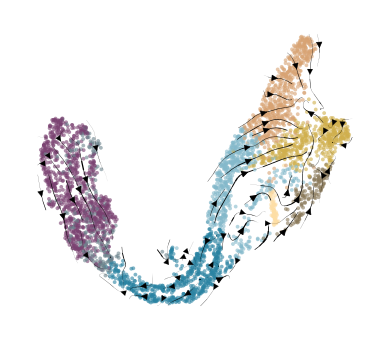

In [4]:
cluster_key = 'clusters'
for method in methods_for_pan:
    for index in range(5):
        # if method == 'latentvelo':
        #     vkey = 'latentvelo_rna_velocity'
        # else:
        vkey = f"{method}_velocity"

        adata = sc.read_h5ad( Path(dataset) / f"adata_run_{method}_{index}.h5ad")

        if issparse(adata.layers[vkey]):
            adata.layers[vkey] = adata.layers[vkey].toarray().astype(np.float32)
        adata.layers[vkey] = np.where(np.isnan(adata.layers[vkey]), 0, adata.layers[vkey])
        sqrt_transform = False
        if method in ["unitvelo_ind", "unitvelo_uni"]:
            sqrt_transform = True
        
        scv.tl.velocity_graph(adata, vkey=vkey, sqrt_transform=sqrt_transform,n_jobs=20)

        adata.uns[f'{cluster_key}_colors'] = umap_colors
        adata.obs[cluster_key] = adata.obs[cluster_key].astype("category")
        cluster_order = adata.obs[cluster_key].cat.categories
        cell_types = adata.obs[cluster_key].values
        unique_types = np.unique(cell_types)
        color_map = {ct: umap_colors[i % len(umap_colors)] for i, ct in enumerate(unique_types)}
        adata.uns[f'{cluster_key}_colors'] = [color_map[c] for c in cluster_order]
        kwargs = dict(
            frameon=True, add_margin=.1,density=1,linewidth=1,alpha=0.6,
            size=30,
        )

        # atac size = 120
        fig, ax = plt.subplots(figsize=(4, 3.5))
        scv.pl.velocity_embedding_stream(
            adata,
            color=cluster_key,
            vkey=vkey,
            basis='umap',
            title='',
            # legend_loc = 'upper right',
            legend_loc='none',
            ax=ax,
            **kwargs,
            show=False
        )
        ax.set_title('')
        ax.axis('off')
        plt.tight_layout()
        plt.savefig(f"{method}_{dataset}_{methods_for_qn[index]}_stream.png", bbox_inches='tight', dpi=300)
        plt.show()